In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from scipy.signal import find_peaks
from scipy.optimize import curve_fit



# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
j = janet.boot(uni, index=2)


Already have data downloaded for Gaia ID 5311109828992983168.
If you want to check for new data, run `janet.update()`.
No postcard object will be created for this target.
No postcard object will be created for this target.
### Running Simple Astropy Lomb-Scargle on Sector 8-9 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 8-9 on star 5311109828992983168 ###
### Saved results ###
### Running Wavelet Estimation for Sector 8-9 on star 5311109828992983168 ###


/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/jazz_hands-0.0.3-py3.8.egg/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/149 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 8-9 on star 5311109828992983168 ###
### Saved results ###
### Running Composite ACF estimation for Sector 8-9 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 8-9 on star 5311109828992983168 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 36 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running Wavelet Estimation for Sector 36 on star 5311109828992983168 ###


  0%|          | 0/75 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running Composite ACF estimation for Sector 36 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running ACF Estimation on star 5311109828992983168 ###
### Completed ACF Estimation on star 5311109828992983168 ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


/Users/oliver hall/Research/michael/Examples/../michael/methods.py:376: UserWarning: The highest peak in the ACF lies outside the period range of your search.
  warnings.warn("The highest peak in the ACF lies outside the period range of your search.")
/Users/oliver hall/Research/michael/Examples/../michael/validate.py:186: UserWarning: No estimates could agree. Please inspect the results carefully yourself.
  warnings.warn("No estimates could agree. Please inspect the results carefully yourself.")
/Users/oliver hall/Research/michael/Examples/../michael/validate.py:228: UserWarning: One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.
  warnings.warn("One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.")
/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, c


------ Decoding Overall Period Flag 772 ------
512: One or more sectors disagrees strongly across all estimates with the others. This may indicate signal from a background star present in those sectors.
256: None of the 3 estimates agreed with one another to within 1 sigma. The CACF estimate is assumed to be the best in this case, if it is available.
4: Best rotation is from the Composite Autocorrelation Function (CACF) method.

No other flags raised. 

### Saved results ###


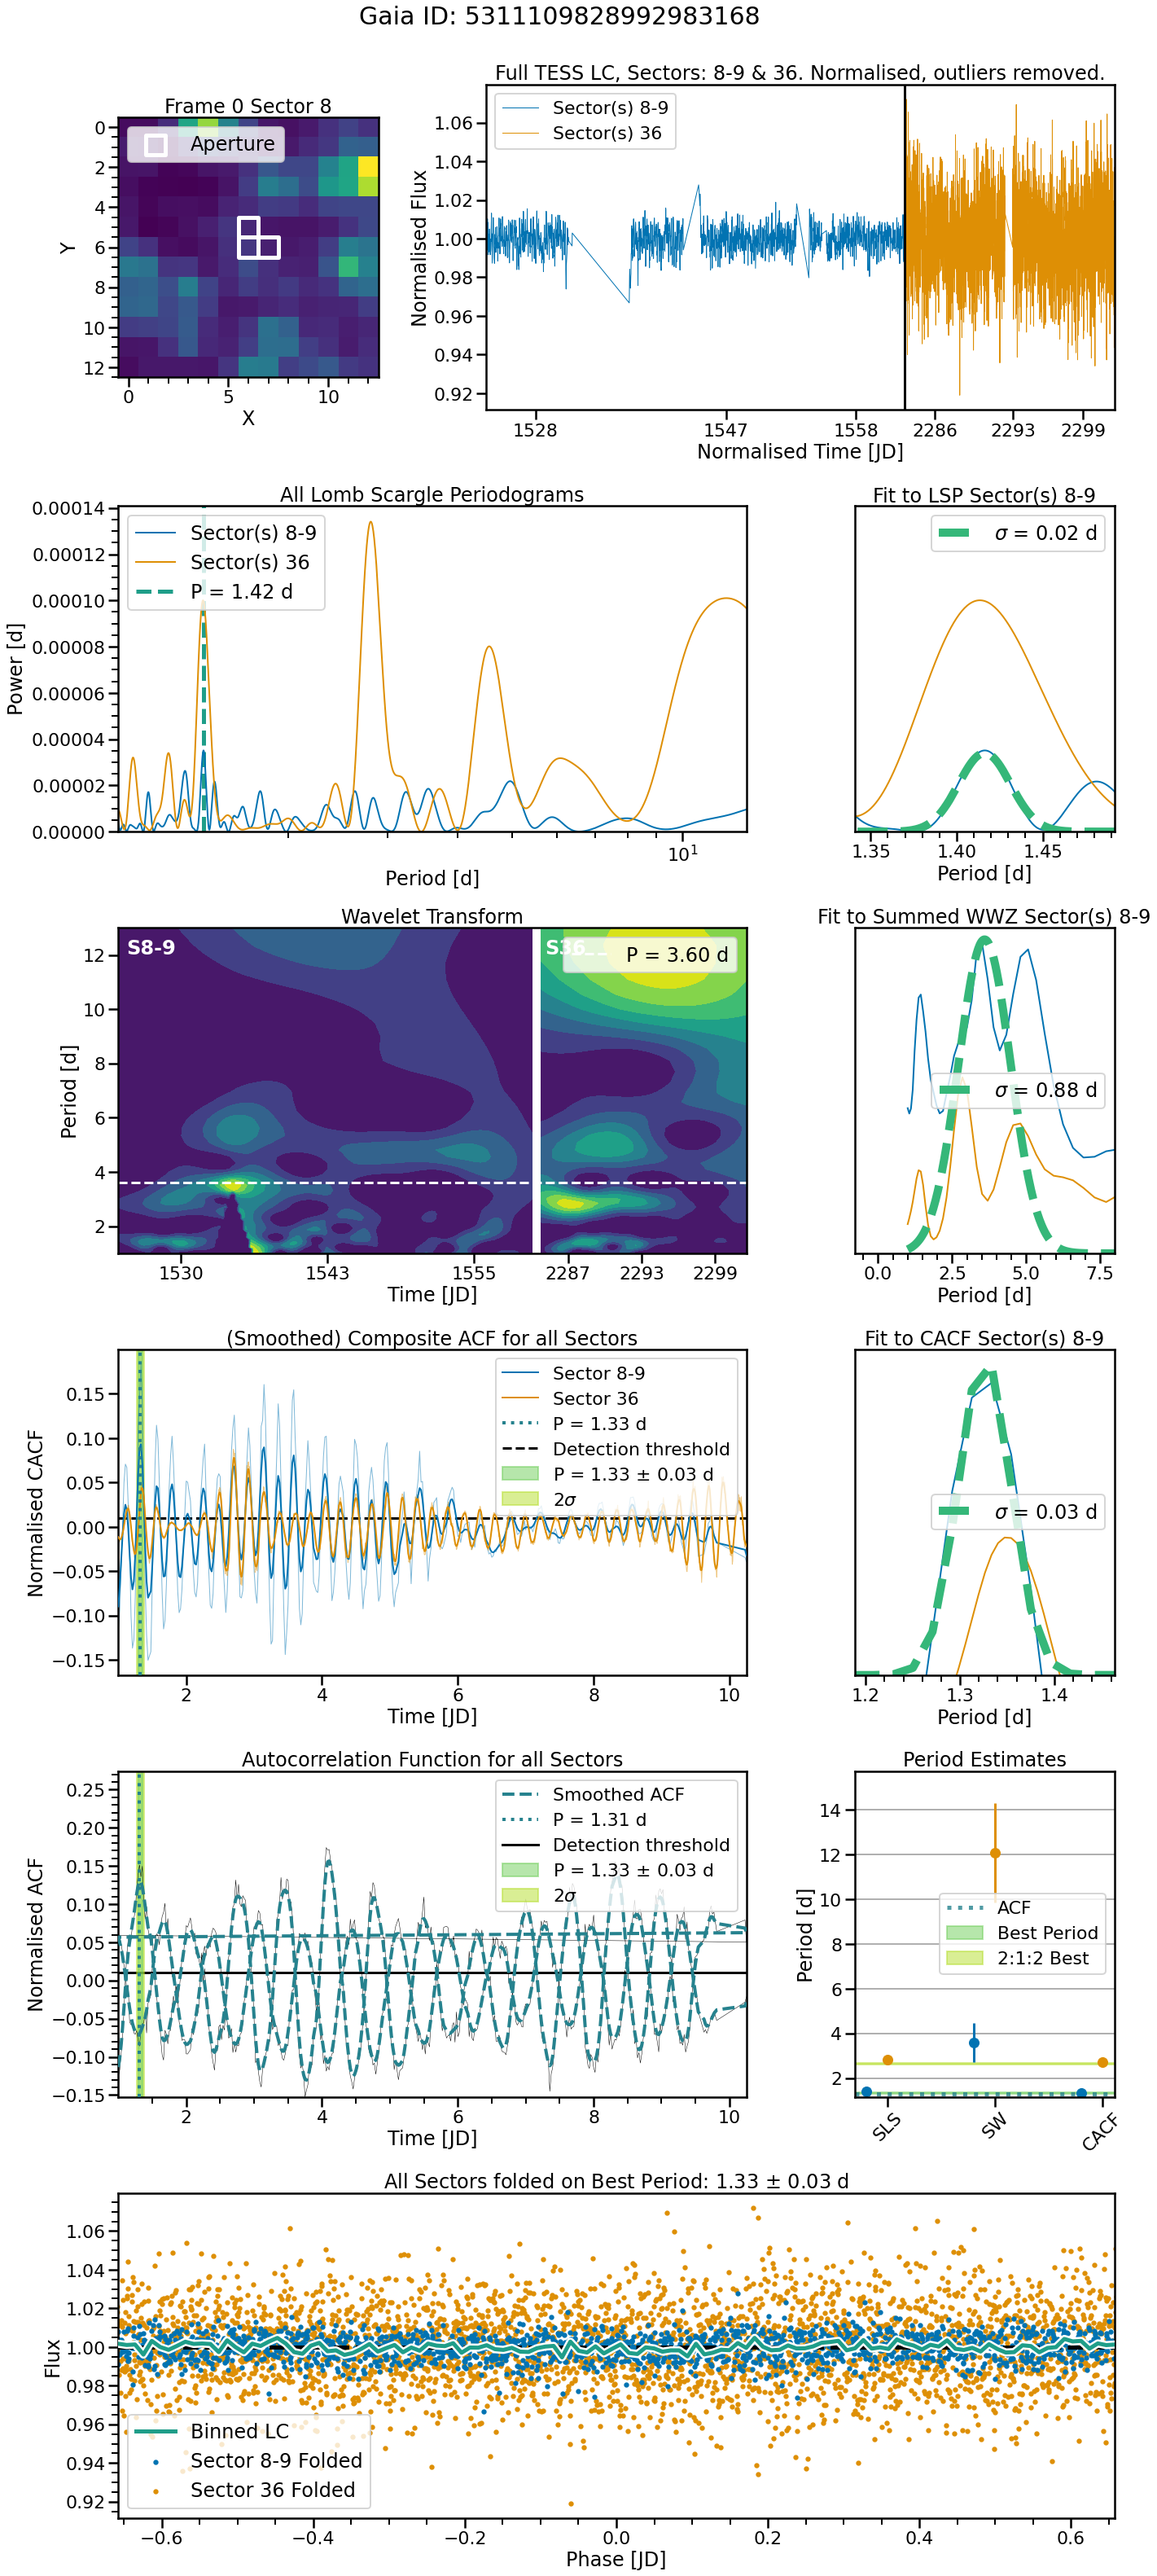

In [4]:
j.run(period_range = (1., 13.))

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

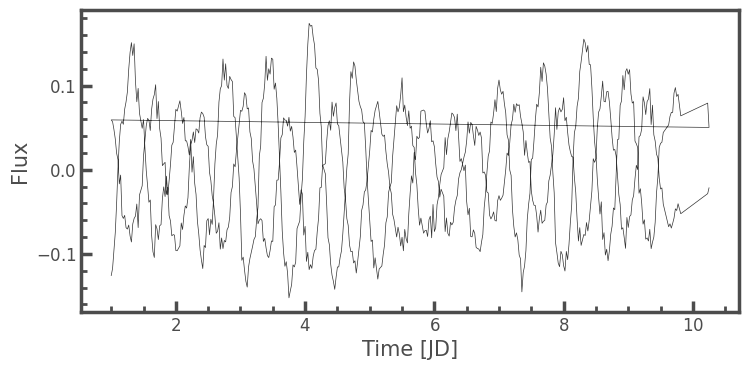

In [13]:
j.void['vizacf'].plot()

In [18]:
import lightkurve as lk
period_range = (1., 13.)

In [19]:
    clc = j.void['clc_all']

    # Calculate the ACF between 0 and 12 days.
    acf = np.correlate(clc.flux.value-1, clc.flux.value-1, mode='full')[len(clc)-1:]
    lag = clc.time.value - np.nanmin(clc.time.value)

    # Cut up and normalize the ACF
    secmin = j.sectors[0]
    norm_acf = acf/np.nanmax(acf)
    acflc = lk.LightCurve(time=lag, flux=norm_acf)
    acflc = acflc[acflc.time.value < (j.void[f'clc_{secmin}'].time.value - j.void[f'clc_{secmin}'].time.value.min()).max()]

    # Estimate a first-guess period
    acfpg = acflc.to_periodogram()
    first_guess = acfpg.period_at_max_power

    # Limit the search range
    if not period_range[0] < first_guess.value < period_range[1]:
        warnings.warn("The highest peak in the ACF lies outside the period range of your search.")
    vizacf = acflc[(acflc.time.value <= period_range[1])]
    vizacf = vizacf[(vizacf.time.value >= period_range[0])]

/var/folders/qh/nrsz4hq94kg510wh1srt1x0ry2q37w/T/ipykernel_93154/2438012780.py:19: UserWarning: The highest peak in the ACF lies outside the period range of your search.
  warnings.warn("The highest peak in the ACF lies outside the period range of your search.")


In [26]:
    acflc = lk.LightCurve(time=lag, flux=norm_acf)
    acflc = acflc[acflc.time.value < (j.void[f'clc_{secmin}'].time.value - j.void[f'clc_{secmin}'].time.value.min()).max()]


(0.0, 100.0)

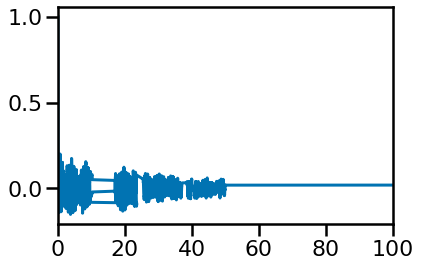

In [29]:
plt.plot(lag, norm_acf)
plt.xlim(0, 100)

In [5]:
j.results

,SLS,e_SLS,h_SLS,f_SLS,SW,e_SW,h_SW,CACF,e_CACF,h_CACF,ACF,s_SLS,s_SW,s_CACF,overall,e_overall,f_overall
8-9,1.416212,0.015111,0.000034,0.0,3.596510,0.878102,1.012552,1.326001,0.027540,0.102531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2.818161,0.119125,0.000132,0.0,12.063915,2.228403,1.031379,2.704398,0.025855,0.084833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.312536,NaN,NaN,NaN,NaN,NaN,NaN
best,1.416212,0.015111,0.000034,0.0,3.596510,0.878102,1.012552,1.326001,0.027540,0.102531,NaN,8-9,8-9,8-9,1.326001,0.02754,772.0


In [6]:
    diffs = np.zeros(len(j.sectors))
    for idx, s in enumerate(j.sectors):
        d = np.diff(np.array(s.split('-')).astype(int))
        if np.isfinite(d):
            diffs[idx] = d

/var/folders/qh/nrsz4hq94kg510wh1srt1x0ry2q37w/T/ipykernel_93154/629360810.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.isfinite(d):


In [7]:
any(diffs > 0)

True

In [8]:
    s = j.results['f_SLS'] == 0
    if len(j.results[s]) > 0:
        idx = np.array(j.results[s]['h_SLS'].idxmax())
    # It may be the case that there are only flagged values. In this
    # case, ignore the flags
    else:
        idx = np.array(j.results['h_SLS'].idxmax())


In [9]:
np.isfinite(idx.astype(int))

True

In [10]:
diffs = np.zeros(len(j.sectors))
for idx, s in enumerate(j.sectors):
    d = np.diff(np.array(s.split('-')).astype(int))
    if np.isfinite(d):
        diffs[idx] = d

/var/folders/qh/nrsz4hq94kg510wh1srt1x0ry2q37w/T/ipykernel_93154/289660544.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.isfinite(d):


In [11]:
np.argmax(diffs)

0

In [12]:
np.argmax([0,0,0])

0